# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from sklearn.metrics import mean_squared_error

# Normalize function for data between [-1,1]

In [2]:
def normalize(values):
  maximum = np.max(values)
  minimum = np.min(values)

  return (2 * (values - minimum) / (maximum - minimum)) - 1

# Generating Data Set

In [3]:
x = np.random.randint(-20, 20, 10000)
y = 5 * x**3 - 8 * x**2 - 7 * x + 1

# Normalizing the Data Set

In [4]:
x_val = normalize(x)
y_val = normalize(y)

# print(x_val)
# print(y_val)

# Splitting the Dataset into training, test and validation Set

In [5]:
total = len(x_val)

# Training set (90%)
x_train = x_val[:int(total * 0.9)]
y_train = y_val[:int(total * 0.9)]

# Vaildation set (5%)
x_valid = x_val[int(total * 0.9):int(total * 0.95)]
y_valid = y_val[int(total * 0.9):int(total * 0.95)]

# Test set (5%)
x_test = x_val[int(total * 0.95):]
y_test = y_val[int(total * 0.95):]

# Building The Model

In [6]:
inputs = Input((1,))

hidden_layer1 = Dense(32, activation='relu')(inputs)
hidden_layer2 = Dense(64, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(128, activation='relu')(hidden_layer2)

outputs = Dense(1, name = 'Output_Layer')(hidden_layer3)

model = Model(inputs, outputs, name = 'DNN_Model')
model.summary()

Model: "DNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[metrics.R2Score(name='accuracy')])
fitted_model = model.fit(x_train, y_train, epochs = 30,  validation_data=(x_valid, y_valid), verbose = 0)

history = fitted_model.history

# Displaying the Training accuracy vs Validation accuracy

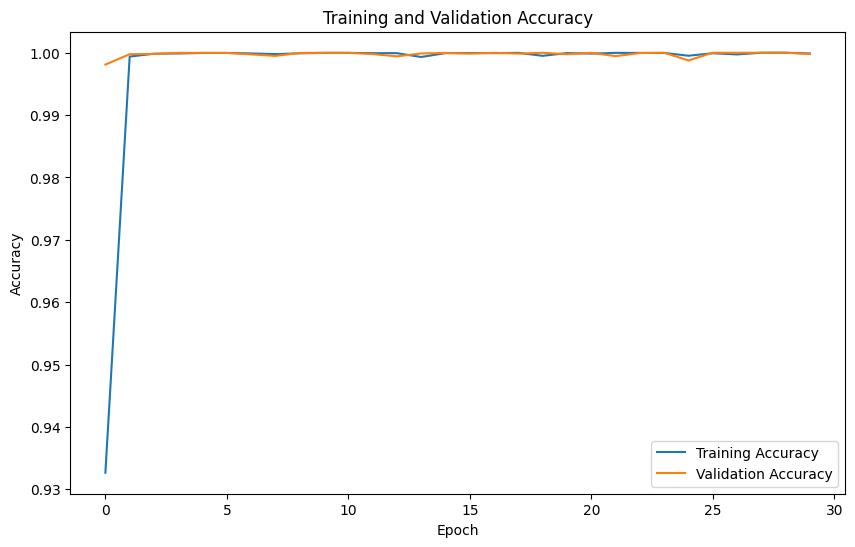

In [8]:
plt.figure(figsize=(10,6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Displaying the Training Error vs Validation Error

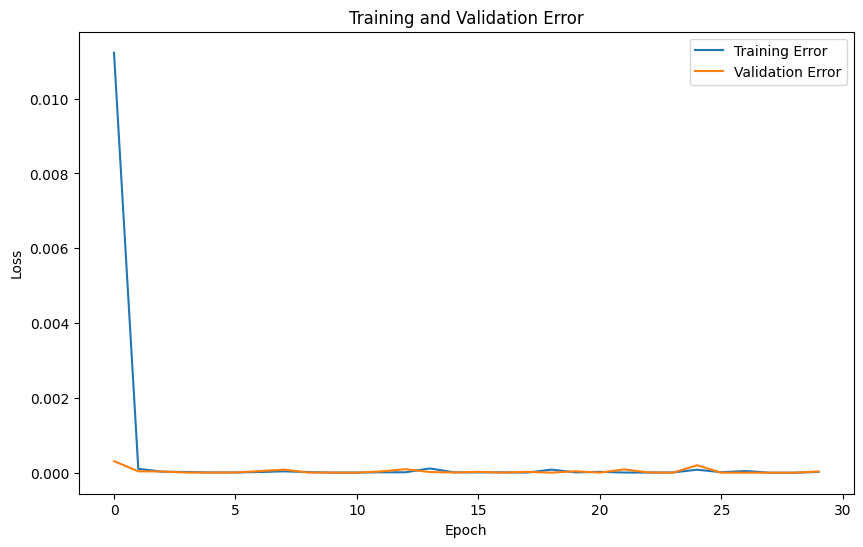

In [9]:
plt.figure(figsize=(10,6))
plt.plot(history['loss'], label='Training Error')
plt.plot(history['val_loss'], label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Error')
plt.show()

# Evaluate the model on test data



In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 3.7810e-05 
Test Loss: 3.482683314359747e-05
Test Accuracy: 0.999772310256958


# Make predictions on test data

In [11]:
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


# Displaying Predictions values vs True values

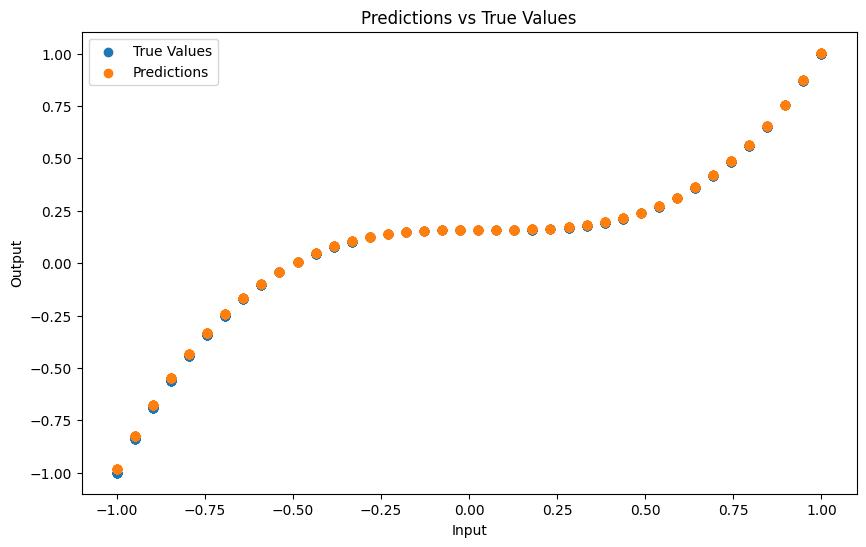

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, label='True Values')
plt.scatter(x_test, y_pred, label='Predictions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.title('Predictions vs True Values')
plt.show()